C:\Users\oscarandres.pinilla\AppData\Local\Temp\ipykernel_16696\1092783706.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscarandres.pinilla\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscarandres.pinilla\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\oscarandres.pinilla\AppData\Local\Temp\ipykernel_16696\1092783706.py:44: RuntimeWarning: invali

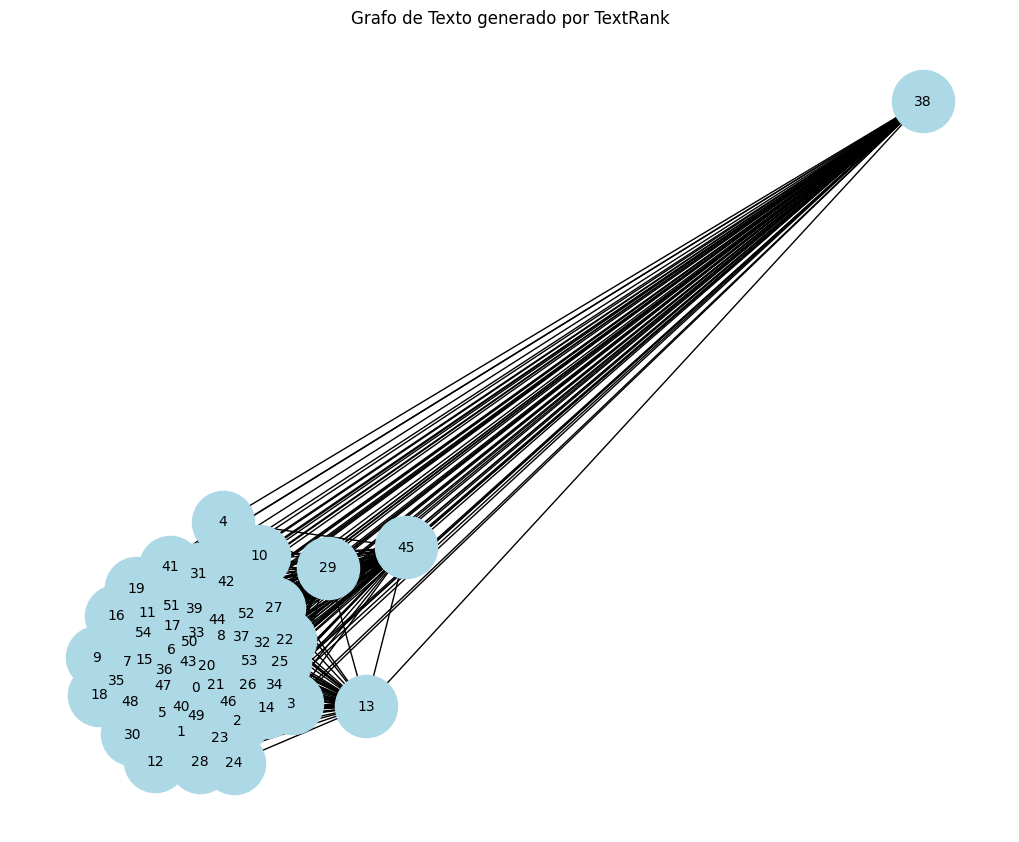

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')


df_ref = pd.read_csv('df_ref.csv')  

primer_articulo = df_ref['article'][0]
primer_resumen = df_ref['abstract'][0]

oraciones = sent_tokenize(primer_articulo)

stop_words = set(stopwords.words('english'))
palabras = [word.lower() for sentence in oraciones for word in word_tokenize(sentence) if word.isalnum() and word.lower() not in stop_words]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(oraciones)

matriz_similitud = cosine_similarity(tfidf_matrix, tfidf_matrix)

d = 0.85
n_iteraciones = 10  

puntuacion = [1] * len(oraciones)  

G = nx.Graph()

for i, oracion in enumerate(oraciones):
    G.add_node(i, label=oracion)

for _ in range(n_iteraciones):
    nueva_puntuacion = [0] * len(oraciones)
    for i in range(len(oraciones)):
        for j in range(len(oraciones)):
            if i != j:
                nueva_puntuacion[i] += (matriz_similitud[i][j] / sum(matriz_similitud[j])) * puntuacion[j]
    puntuacion = [(1 - d) + d * valor for valor in nueva_puntuacion]

for i in range(len(oraciones)):
    for j in range(len(oraciones)):
        if i != j:
            G.add_edge(i, j, weight=matriz_similitud[i][j])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G) 
edge_labels = {}
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Grafo de Texto generado por TextRank')
plt.show()

In [7]:
# Obtener el índice de las oraciones más importantes según las puntuaciones
indices_importantes = sorted(range(len(puntuacion)), key=lambda i: puntuacion[i], reverse=True)

# Elegir las primeras oraciones más importantes para formar el resumen
longitud_resumen = min(5, len(indices_importantes))  # Elegir hasta las primeras 5 oraciones más importantes
resumen_indices = indices_importantes[:longitud_resumen]
resumen = [oraciones[i] for i in sorted(resumen_indices)]

# Imprimir el resumen
print("Resumen:")
for oracion in resumen:
    print(oracion)



Resumen:
direct central nervous system ( cns ) involvement in hodgkin 's lymphoma is extremely rare with an incidence of approximately 0.02% , though primary manifestations of hodgkin 's lymphoma in meninges , cerebral fluid   or the brain parenchyma   are known .
cerebral involvement as cns - hodgkin 's lymphoma is described in patients with former chronic lymphatic leukemia as a richter transformation .
cns manifestations , such as paraneoplastic cerebellar degeneration ( pcd ) in the presence of antibodies ( i.e.
anti - tr or anti - mglur1 ) against antigens in purkinje cells , are well known paraneoplastic manifestations of lymphomas [ 6 , 7 ] .
suggested therapies are steroids , intravenous immunoglobulin and plasmapheresis .
